In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON file into a DataFrame
df = pd.read_json('timeAPI.json')
df['method_url'] = df['invocation_method'] + ' ' + df['normalized_url']

# Display the first few rows to verify
df.columns

Index(['debug_type', 'transaction_id', 'invocation_method', 'invocation_url',
       'request_timestamp', 'response_timestamp', 'invocation_status_code',
       'normalized_url', 'response_time_ms', 'invocation_count', 'method_url'],
      dtype='object')

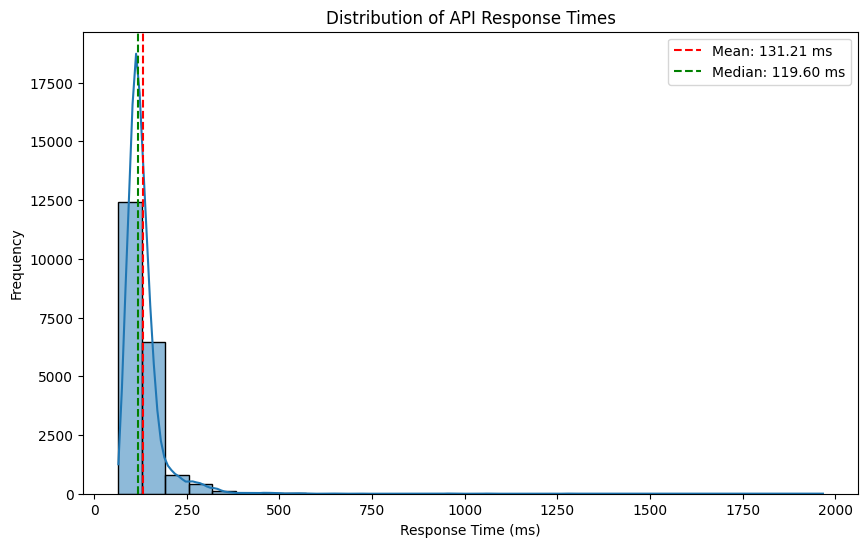

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['response_time_ms'], bins=30, kde=True)
plt.title('Distribution of API Response Times')
plt.xlabel('Response Time (ms)')
plt.ylabel('Frequency')
plt.axvline(df['response_time_ms'].mean(), color='red', linestyle='--', label=f'Mean: {df["response_time_ms"].mean():.2f} ms')
plt.axvline(df['response_time_ms'].median(), color='green', linestyle='--', label=f'Median: {df["response_time_ms"].median():.2f} ms')
plt.legend()
plt.show()


In [23]:
# Get count of records by method_url
method_url_counts = df['method_url'].value_counts()

# Display the results
print(method_url_counts)

method_url
GET /api/v2/telephony/providers/edges/extensionpools    2396
GET /api/v2/authorization/subjects/{GUID}               2385
GET /api/v2/voicemail/userpolicies/{GUID}               2378
GET /api/v2/routing/users/{GUID}/utilization            2367
GET /api/v2/users/{GUID}/externalid                     2304
                                                        ... 
GET /api/v2/flows/milestones                               1
GET /api/v2/journey/segments                               1
GET /api/v2/journey/actionmaps                             1
GET /api/v2/identityproviders/salesforce                   1
GET /api/v2/webdeployments/configurations                  1
Name: count, Length: 155, dtype: int64


<Figure size 1600x1000 with 0 Axes>

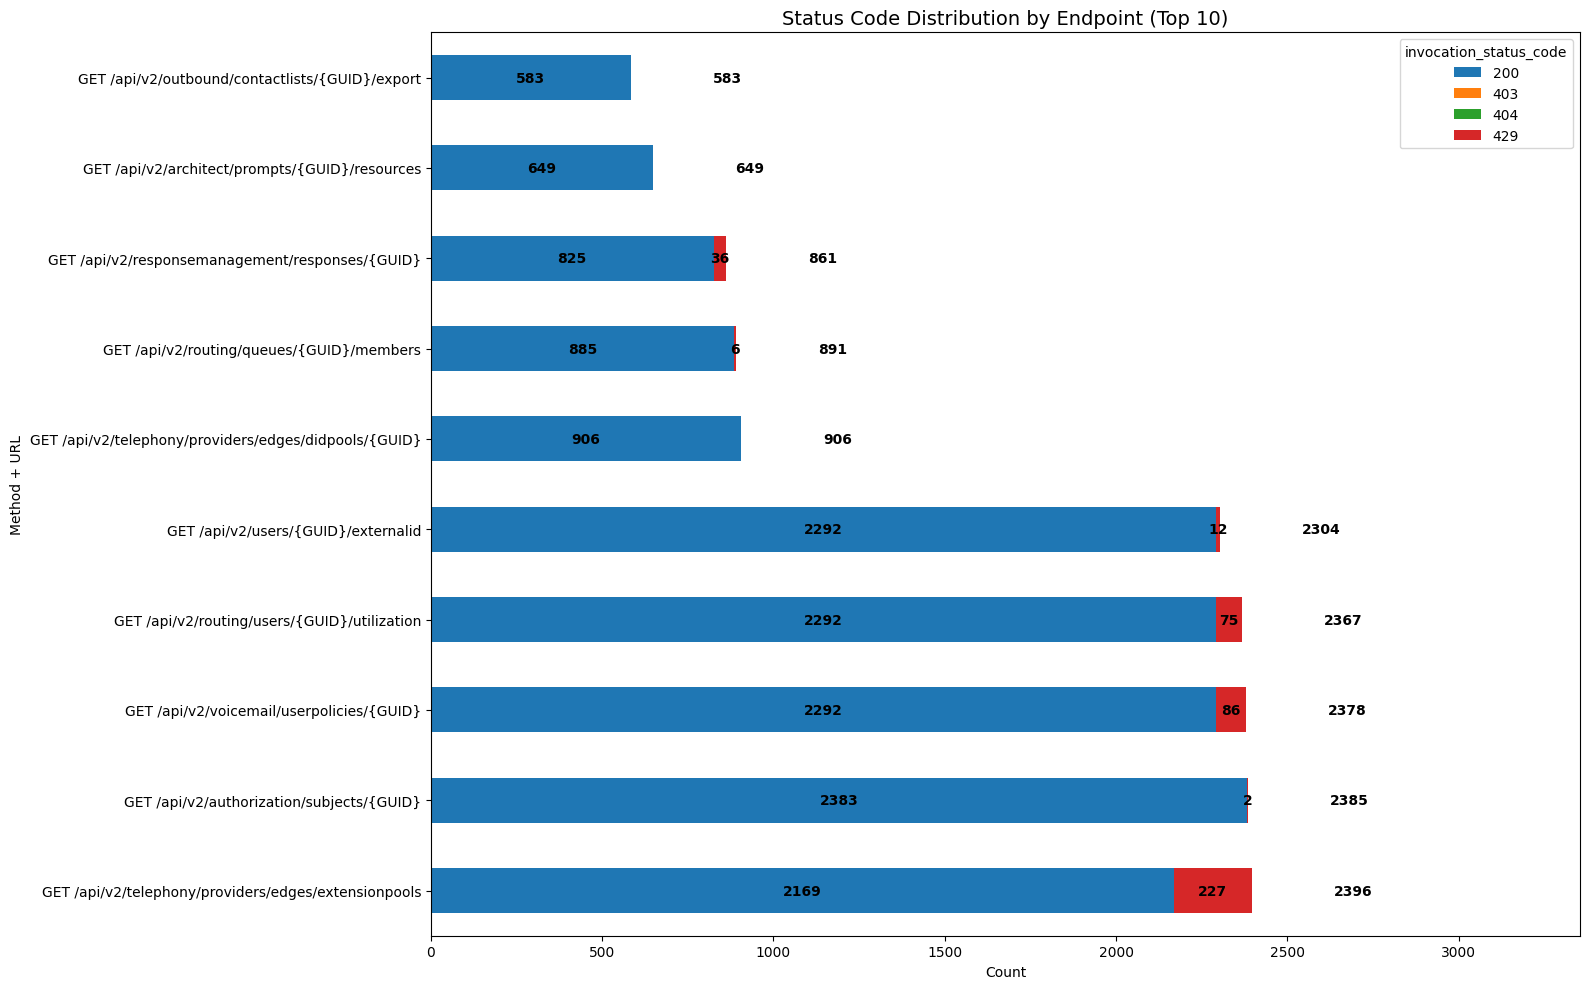

In [38]:
# Group by method_url and count status codes
status_by_endpoint = df.groupby('method_url')['invocation_status_code'].value_counts().unstack(fill_value=0)

# Add a total column and sort
status_by_endpoint['total'] = status_by_endpoint.sum(axis=1)
status_by_endpoint = status_by_endpoint.sort_values('total', ascending=False)

# Get top N endpoints for better visualization
top_n = 10  # Adjust this number to show more or fewer entries
plt.figure(figsize=(16, 10))
ax = top_endpoints.drop('total', axis=1).plot(kind='barh', stacked=True, figsize=(16, 10))

# Add labels to each section of the bars
for i, row in enumerate(top_endpoints.drop('total', axis=1).values):
    x_offset = 0
    for j, value in enumerate(row):
        if value > 0:  # Only add label if the value is greater than 0
            ax.text(x_offset + value/2, i, str(int(value)), 
                   ha='center', va='center', fontweight='bold', color='black')
        x_offset += value
    
    # Add total label further away from the end of each bar (100px equivalent)
    total = top_endpoints['total'].iloc[i]
    offset_distance = max_value * 0.1  # This is roughly equivalent to 100px
    ax.text(x_offset + offset_distance, i, str(int(total)), 
           ha='left', va='center', fontweight='bold', color='black')

# Get the maximum total value and add padding
max_value = top_endpoints['total'].max()
ax.set_xlim(0, max_value * 1.4)  # Add 40% padding to the right to accommodate the offset

# Add title and labels
plt.title('Status Code Distribution by Endpoint (Top 10)', fontsize=14)
plt.ylabel('Method + URL')
plt.xlabel('Count')
plt.tight_layout()
plt.show()
